# Dream Bank

# Part 1: Text Preprocessing

**Packages**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import altair as alt
alt.data_transformers.disable_max_rows()

import re
import nltk
import string
import unicodedata

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
wc_stopwords = set(STOPWORDS)

from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize, TweetTokenizer, sent_tokenize

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer

from umap import UMAP

from tqdm import tqdm
from pprint import pprint
tqdm.pandas()

RANDOM_STATE = 1805

C:\Users\sebas\Anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


**Stopwords**

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk_eng_stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# 1. Load Data

In [3]:
dreams_df = pd.DataFrame()
dreams_files = os.listdir('dreams')
for file in dreams_files:
    temp_df = pd.read_csv('dreams/{}'.format(file), index_col=0)
    dreams_df = pd.concat([dreams_df, temp_df], axis=0, ignore_index=True)

In [4]:
dreams_df

,dreamer,description,number,date,content
0,alta,Alta: a detailed dreamer,1,1957,"The one at the Meads's house, where it's bigge..."
1,alta,Alta: a detailed dreamer,2,8/11/67,I'm at a family reunion in a large fine house ...
2,alta,Alta: a detailed dreamer,3,8/1/85,I watch a plane fly past and shortly realize i...
3,alta,Alta: a detailed dreamer,4,1985,Me pulling the green leaves and berries off so...
4,alta,Alta: a detailed dreamer,5,1985,I'm in a room that reminds me of (but definite...
...,...,...,...,...,...
29340,zurich-m.de,"Swiss children, auf Deutsch (M)",27-C-1,1994-01-30 (15.5 Jahre),Ich bin mit meiner Klasse in einem Kurort gewe...
29341,zurich-m.de,"Swiss children, auf Deutsch (M)",27-C-2,1994-02-27 (15.5 Jahre),"Wir haben ein Fest gehabt, ich, meine Familie ..."
29342,zurich-m.de,"Swiss children, auf Deutsch (M)",27-C-3,1993-10-12 (15.2 Jahre),"Ich und die Familie, die beiden Grossmütter vo..."
29343,zurich-m.de,"Swiss children, auf Deutsch (M)",27-C-4,1994-04-23 (15.7 Jahre),Es ist ein schöner Morgen gewesen. Und ich bin...


In [5]:
dreams_df.to_csv('dreams_df.csv', index=0)

In [9]:
dreams_df = pd.read_csv('dreams_df.csv')
dreams_df

,dreamer,description,number,date,content
0,alta,Alta: a detailed dreamer,1,1957,"The one at the Meads's house, where it's bigge..."
1,alta,Alta: a detailed dreamer,2,8/11/67,I'm at a family reunion in a large fine house ...
2,alta,Alta: a detailed dreamer,3,8/1/85,I watch a plane fly past and shortly realize i...
3,alta,Alta: a detailed dreamer,4,1985,Me pulling the green leaves and berries off so...
4,alta,Alta: a detailed dreamer,5,1985,I'm in a room that reminds me of (but definite...
...,...,...,...,...,...
29340,zurich-m.de,"Swiss children, auf Deutsch (M)",27-C-1,1994-01-30 (15.5 Jahre),Ich bin mit meiner Klasse in einem Kurort gewe...
29341,zurich-m.de,"Swiss children, auf Deutsch (M)",27-C-2,1994-02-27 (15.5 Jahre),"Wir haben ein Fest gehabt, ich, meine Familie ..."
29342,zurich-m.de,"Swiss children, auf Deutsch (M)",27-C-3,1993-10-12 (15.2 Jahre),"Ich und die Familie, die beiden Grossmütter vo..."
29343,zurich-m.de,"Swiss children, auf Deutsch (M)",27-C-4,1994-04-23 (15.7 Jahre),Es ist ein schöner Morgen gewesen. Und ich bin...


In [10]:
# dreams_df['date'] = pd.to_datetime(dreams_df['date'], errors='coerce')

In [11]:
dreams_df.isnull().sum()

dreamer           0
description       0
number            0
date           3566
content           0
dtype: int64

# 2. Exploratory Data Analysis

## 2.1. Text Preprocessing

In [12]:
# Handles Apostrophes
APPO = {
    "aren't" : "are not", "can't" : "cannot", "couldn't" : "could not",
    "didn't" : "did not", "doesn't" : "does not", "don't" : "do not",
    "hadn't" : "had not", "hasn't" : "has not", "haven't" : "have not",
    "he'd" : "he would", "he'll" : "he will", "he's" : "he is",
    "i'd" : "I would", "i'd" : "I had", "i'll" : "I will", "i'm" : "I am",
    "isn't" : "is not", "it's" : "it is", "it'll":"it will", "i've" : "I have",
    "let's" : "let us", "mightn't" : "might not", "mustn't" : "must not",
    "shan't" : "shall not", "she'd" : "she would", "she'll" : "she will",
    "she's" : "she is", "shouldn't" : "should not", "that's" : "that is",
    "there's" : "there is", "they'd" : "they would", "they'll" : "they will",
    "they're" : "they are", "they've" : "they have", "we'd" : "we would",
    "we're" : "we are", "weren't" : "were not", "we've" : "we have",
    "what'll" : "what will", "what're" : "what are", "what's" : "what is",
    "what've" : "what have", "where's" : "where is", "who'd" : "who would",
    "who'll" : "who will", "who're" : "who are", "who's" : "who is",
    "who've" : "who have", "won't" : "will not", "wouldn't" : "would not",
    "you'd" : "you would", "you'll" : "you will", "you're" : "you are",
    "you've" : "you have", "'re": " are", "wasn't": "was not", "we'll":" will",
    "didn't": "did not", "tryin'":"trying"
}

# Preprocessing Steps
def remove_non_ascii(text):
    words = text.split()
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word) \
                              .encode('ascii', 'ignore') \
                              .decode('utf-8' ,'ignore')
        new_words.append(new_word)
    text = ' '.join(new_words)
    return text

def remove_http_links(text):
    text = re.sub(r'http\S+', ' ', text)
    return text

def remove_emails(text):
    text = re.sub(r'www\S+', ' ', text)
    return text

def remove_punctuation(text):
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    return text

def remove_one_char_words(text):
    words = text.split()
    words = [word for word in words if len(word.strip()) > 1]
    text = ' '.join(words)
    return text

def remove_numbers(text):
    text = re.sub(r'\w*\d\w*', '', text)
    return text

def lemmatize_with_postag(text, _tag_='n'):
    sentence = TextBlob(text)
    tag_dict = {'J': 'a', 'N': 'n', 'V': 'v', 'R': 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], _tag_)) for w, pos in sentence.tags]
    lemmatized_words = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    text = ' '.join(lemmatized_words)
    return text

In [13]:
lemmatizer = WordNetLemmatizer()
tweetTokenizer = TweetTokenizer()

def corpus_text_preprocessing(text):
    """ AAA """
    # Regular Expressions (1)
    text = text.lower()
    text = remove_non_ascii(text)
    text = remove_emails(text)
    text = remove_http_links(text)
    text = re.sub('\\n', '', text)
    text = re.sub('\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', '', text)

    # Regular Expressions (2)
    text = remove_punctuation(text)
    text = remove_one_char_words(text) 
    text = remove_numbers(text)

    # Remove stopwords (1)
    words = tweetTokenizer.tokenize(text)
    words = [APPO[word] if word in APPO else word for word in words]
    words = [w for w in words if not w in nltk_eng_stopwords]
    text = ' '.join(words)

    # Word/Verb lemmatization
    text = lemmatize_with_postag(text, 'v')
    text = lemmatize_with_postag(text, 'n')

    # Remove stopwords (2)
    words = tweetTokenizer.tokenize(text)
    words = [w for w in words if not w in nltk_eng_stopwords]
    cleaned_text = ' '.join(words)

    # Remove Punctuation
    table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    cleaned_text = cleaned_text.translate(table)
    cleaned_text = ' '.join([w for w in cleaned_text.split()])

    return cleaned_text

In [14]:
test_input = dreams_df['content'].loc[0]
print('Before Text Preprocessing')
pprint(test_input)

print('\nAfter Text Preprocessing')
pprint(corpus_text_preprocessing(test_input))

Before Text Preprocessing
("The one at the Meads's house, where it's bigger inside than out; there's a "
 'European village just inside, with a cobblestone street and a Pied-Piper '
 'sort of man with curly hair, he can do things like juggle - I go up the back '
 "stairs [there aren't any in the real house] and then down the other side "
 "[since there's a second set, immediately] then down a short empty hallway "
 'that turns a corner, where I find a tiny room...a young woman with '
 'shoulder-length blonde hair in a pageboy is there, cooking at a stove that '
 "almost fills the room...she's nice to me. Now outside, I'm waiting for my "
 'aunt to pick me up - she arrives in a little round convertible and we go for '
 'a drive, not very far - we cross a little bridge over a creek, then double '
 'back and she drops me off at the house again. Inside (?) I sit with a couple '
 'of people, playing with a string of blue balloons.')

After Text Preprocessing
('one mead house big inside euro

In [15]:
%%time
dreams_df['text_cleaned'] = \
      dreams_df['content'].progress_apply(lambda x: corpus_text_preprocessing(x))

100%|████████████████████████████████████████████████████████████████████████████| 29345/29345 [06:24<00:00, 76.31it/s]

Wall time: 6min 24s


In [16]:
dreams_df.to_csv('dreams_cleaned_df.csv', index=0)

In [17]:
dreams_cleaned_df = pd.read_csv('dreams_cleaned_df.csv')

In [18]:
dreams_cleaned_df.head()

,dreamer,description,number,date,content,text_cleaned
0,alta,Alta: a detailed dreamer,1,1957,"The one at the Meads's house, where it's bigge...",one mead house big inside european village ins...
1,alta,Alta: a detailed dreamer,2,8/11/67,I'm at a family reunion in a large fine house ...,family reunion large fine house ground maybe r...
2,alta,Alta: a detailed dreamer,3,8/1/85,I watch a plane fly past and shortly realize i...,watch plane fly past shortly realize low crash...
3,alta,Alta: a detailed dreamer,4,1985,Me pulling the green leaves and berries off so...,pull green leaf berry branch bush live one gro...
4,alta,Alta: a detailed dreamer,5,1985,I'm in a room that reminds me of (but definite...,room remind definitely living room house stree...


## 2.2. Tag Distribution

In [19]:
dreams_cleaned_df['dreamer'].value_counts()

vonuslar.de    6094
b              3114
kenneth        2021
elizabeth      1707
norman         1235
               ... 
tom              27
dahlia           24
mark             23
edna             19
ringo            16
Name: dreamer, Length: 74, dtype: int64

In [20]:
dreams_cleaned_df['dreamer'].unique()

array(['alta', 'angie', 'arlie', 'b-baseline', 'b', 'b2',
       'bay_area_girls_456', 'bay_area_girls_789', 'bea1', 'bea2',
       'blind-f', 'blind-m', 'bosnak', 'chris', 'chuck', 'dahlia',
       'david', 'dorothea', 'ed', 'edna', 'elizabeth', 'emma',
       'emmas_husband', 'esther', 'german-f.de', 'german-m.de',
       'hall_female', 'jasmine1', 'jasmine2', 'jasmine3', 'jasmine4',
       'jeff', 'joan', 'kenneth', 'lawrence', 'mack', 'madeline1-hs',
       'madeline2-dorms', 'madeline3-offcampus', 'madeline4-postgrad',
       'mark', 'melissa', 'melora', 'melvin', 'merri', 'miami-home',
       'miami-lab', 'midwest_teens-f', 'midwest_teens-m', 'nancy',
       'natural_scientist', 'norman', 'norms-f', 'norms-m', 'pegasus',
       'peru-f', 'peru-m', 'phil1', 'phil2', 'phil3', 'physiologist',
       'ringo', 'samantha', 'seventh_graders', 'toby', 'tom',
       'ucsc_women', 'vickie', 'vietnam_vet', 'vonuslar.de', 'wedding',
       'west_coast_teens', 'zurich-f.de', 'zurich-m.de'], d

In [21]:
german_dreamers = dreams_cleaned_df['dreamer'].unique().tolist()
german_dreamers = [el for el in german_dreamers if '.de' in el]
german_dreamers

['german-f.de', 'german-m.de', 'vonuslar.de', 'zurich-f.de', 'zurich-m.de']

In [22]:
dreams_cleaned_df = dreams_cleaned_df[~dreams_cleaned_df['dreamer'].isin(german_dreamers)].copy()
dreams_cleaned_df.shape

(22415, 6)

In [23]:
dreams_cleaned_df['dreamer'].value_counts()

b            3114
kenneth      2021
elizabeth    1707
norman       1235
emma         1221
             ... 
tom            27
dahlia         24
mark           23
edna           19
ringo          16
Name: dreamer, Length: 69, dtype: int64

## 2.3. Word Cloud Distribution

In [24]:
def show_wordcloud(data, figsize, cmap='viridis', title=None):
    """ https://www.kaggle.com/gpreda/jigsaw-eda """
    wordcloud = WordCloud(
        background_color='white',
        stopwords=wc_stopwords,
        colormap=cmap,
        max_words=60,
        max_font_size=40, 
        scale=2,
        random_state=RANDOM_STATE
    ).generate(str(data))

    fig = plt.figure(1, figsize=figsize)
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=10)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

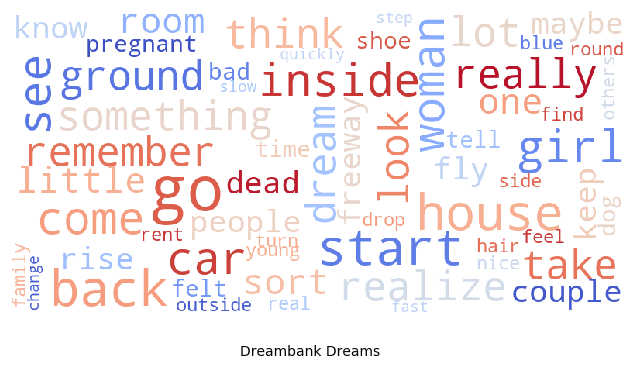

In [25]:
show_wordcloud(dreams_cleaned_df['text_cleaned'].values, figsize=(8,8), cmap='coolwarm',
               title='Dreambank Dreams')

In [26]:
dreams_cleaned_df[dreams_cleaned_df['text_cleaned'].isnull()]

,dreamer,description,number,date,content,text_cleaned
1008,b,Barb Sanders,76,07/03/79,1800's.,NaN


In [27]:
dreams_cleaned_df = dreams_cleaned_df.dropna(subset=['text_cleaned'])
dreams_cleaned_df[dreams_cleaned_df['text_cleaned'].isnull()]

,dreamer,description,number,date,content,text_cleaned


## 2.5. Top Unigram / Bigram / Trigrams

**Top Unigrams**

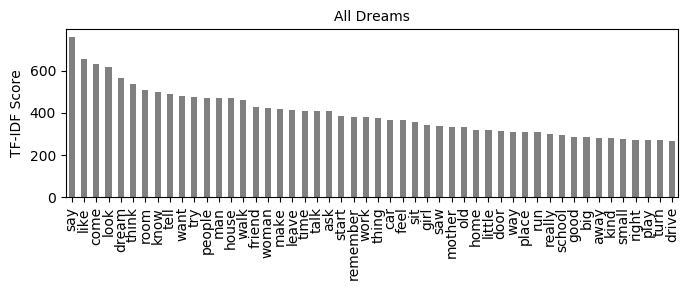

Wall time: 3.14 s


In [28]:
%%time
clean_corpus = dreams_cleaned_df['text_cleaned'].values
tfv = TfidfVectorizer(min_df=50, max_features=10000, 
                      strip_accents='unicode', analyzer='word',
                      ngram_range=(1, 1), use_idf=1, smooth_idf=1,
                      sublinear_tf=1, stop_words='english')

tfv.fit(clean_corpus)

features = np.array(tfv.get_feature_names())
train_unigrams = tfv.transform(clean_corpus)
train_unigrams = pd.DataFrame(train_unigrams.toarray(), columns=features)

top_features_all = train_unigrams.sum(axis=0) \
                                 .sort_values(ascending=False)

# Plot
f, ax = plt.subplots(figsize=(7, 3))
top_features_all.head(50).plot.bar(ax=ax, color='grey')
ax.set_title('All Dreams', fontsize=10)
ax.set_ylabel('TF-IDF Score', fontsize=10)
f.tight_layout()
plt.show()

In [29]:
top_features_all

say         757.537676
like        655.706464
come        629.219396
look        618.977569
dream       564.177087
               ...    
tension       8.252624
casually      8.177572
pulled        8.090045
facility      7.881559
residue       7.876370
Length: 2696, dtype: float64

**Top Bigrams**

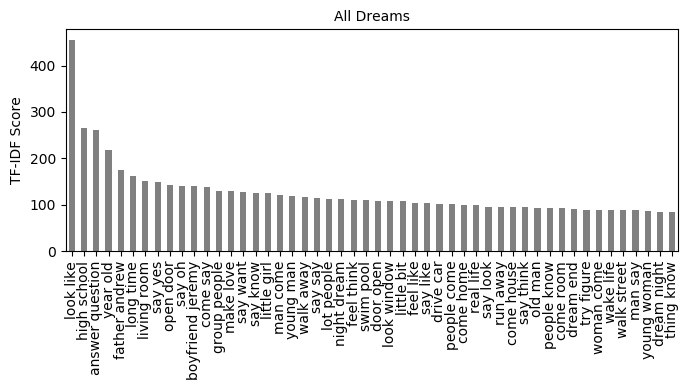

Wall time: 6.2 s


In [30]:
%%time
clean_corpus = dreams_cleaned_df['text_cleaned'].values
tfv = TfidfVectorizer(min_df=50, max_features=10000, 
                      strip_accents='unicode', analyzer='word',
                      ngram_range=(2, 2), use_idf=1, smooth_idf=1,
                      sublinear_tf=1, stop_words='english')

tfv.fit(clean_corpus)

features = np.array(tfv.get_feature_names())
train_unigrams = tfv.transform(clean_corpus)
train_unigrams = pd.DataFrame(train_unigrams.toarray(), columns=features)

top_features_all = train_unigrams.sum(axis=0) \
                                 .sort_values(ascending=False)

# Plot
f, ax = plt.subplots(figsize=(7, 4))
top_features_all.head(50).plot.bar(ax=ax, color='grey')
ax.set_title('All Dreams', fontsize=10)
ax.set_ylabel('TF-IDF Score', fontsize=10)
f.tight_layout()
plt.show()